In [1]:
print("Let's starts baby")

Let's starts baby


In [2]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [3]:
BASE_DIR = '/kaggle/input/flickr8k'
WORKING_DIR = '/kaggle/working'

## Architecture of VGG16
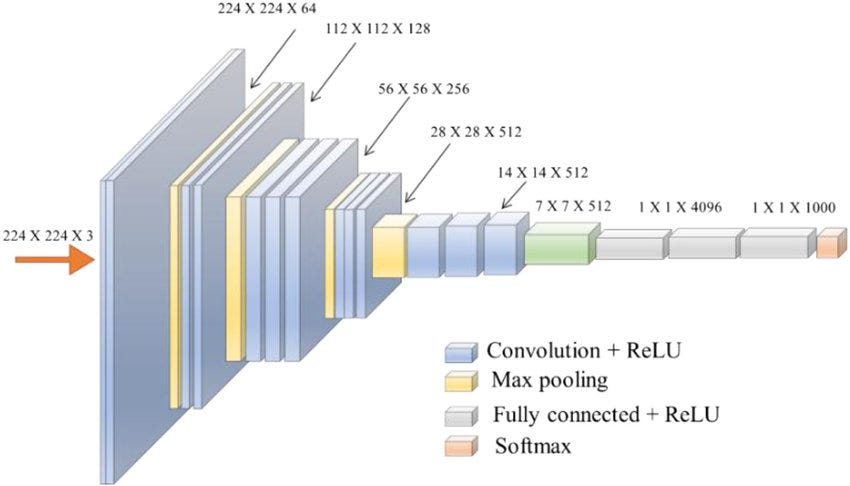

## Understanding VGG16

### Overview

VGG16 is a convolutional neural network architecture developed by the Visual Geometry Group (VGG) at the University of Oxford. It is known for its simplicity and effectiveness in image classification tasks. VGG16 was introduced in the paper "Very Deep Convolutional Networks for Large-Scale Image Recognition" by Karen Simonyan and Andrew Zisserman.

### Architecture

VGG16 is composed of 16 layers, which include 13 convolutional layers and 3 fully connected (dense) layers. The architecture is characterized by its use of small convolutional filters (3x3) and a deep network structure. Here is a detailed breakdown of the VGG16 architecture:

1. **Convolutional Layers**:
   - **First Block**:
     - Two convolutional layers with 64 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.
   - **Second Block**:
     - Two convolutional layers with 128 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.
   - **Third Block**:
     - Three convolutional layers with 256 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.
   - **Fourth Block**:
     - Three convolutional layers with 512 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.
   - **Fifth Block**:
     - Three convolutional layers with 512 filters, each of size 3x3, followed by a ReLU activation function.
     - A max-pooling layer with a pool size of 2x2 and stride of 2.

2. **Fully Connected Layers**:
   - **First Dense Layer**:
     - A fully connected layer with 4096 units and ReLU activation.
   - **Second Dense Layer**:
     - A fully connected layer with 4096 units and ReLU activation.
   - **Third Dense Layer**:
     - A fully connected layer with 1000 units (corresponding to the number of classes in the ImageNet dataset) and a softmax activation function.

3. **Output Layer**:
   - The output layer provides the probabilities for each class, based on the classification task.

### Key Features

- **Small Convolutional Filters**: VGG16 uses 3x3 convolutional filters throughout the network, which helps in capturing fine details and patterns in images.
- **Deep Architecture**: The network is relatively deep, which allows it to learn hierarchical features from the data.
- **Max-Pooling**: Max-pooling layers are used to reduce the spatial dimensions of the feature maps and introduce translational invariance.
- **ReLU Activation**: The ReLU activation function is applied after each convolutional layer and dense layer to introduce non-linearity.

### Applications

- **Image Classification**: VGG16 has been widely used for image classification tasks and serves as a backbone for various computer vision models.
- **Feature Extraction**: The convolutional layers of VGG16 can be used as a feature extractor in transfer learning and other tasks.
- **Transfer Learning**: Pre-trained VGG16 models can be fine-tuned for specific tasks by adding and training additional layers.

### Summary

VGG16 is a foundational model in computer vision, known for its simplicity and effectiveness in image recognition tasks. Its deep architecture and consistent use of small convolutional filters make it a versatile model for various image processing applications.


In [4]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


## Extracting Features from Images

1. **Initialize the Features Dictionary**:
   - Create an empty dictionary, `features`, to store the extracted features for each image.

2. **Set Up the Directory Path**:
   - Define the directory containing the images using the `BASE_DIR` and `Images` folder.

3. **Iterate Over Images in the Directory**:
   - Loop through each image file in the specified directory using `os.listdir()`.

4. **Load and Preprocess Each Image**:
   - For each image file:
     - Construct the full path to the image.
     - Load the image from the file and resize it to `(224, 224)` pixels.
     - Convert the image to a numpy array.
     - Reshape the array to match the input shape required by the model (e.g., adding an extra dimension).

5. **Preprocess the Image for VGG**:
   - Apply the preprocessing function to prepare the image for feature extraction using the VGG model.

6. **Extract Features Using the Model**:
   - Use the model to predict the features of the preprocessed image.
   - The `predict()` function will return the feature representation of the image.

7. **Store Features in the Dictionary**:
   - Extract the image ID from the filename (excluding the extension).
   - Store the extracted features in the dictionary with the image ID as the key.

By following these steps, we can efficiently extract and store features from a collection of images using a pre-trained model.


In [5]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, 'Images')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

## Understanding Pickle in Python

### What is Pickle?

Pickle is a Python module used for serializing and deserializing Python objects. Serialization (or "pickling") converts a Python object into a byte stream, and deserialization (or "unpickling") converts the byte stream back into a Python object. This allows you to save Python objects to a file or transmit them over a network and later restore them.

### Key Functions

1. **`pickle.dump(obj, file)`**:
   - **Purpose**: Serializes a Python object and writes it to a file.
   - **Parameters**:
     - `obj`: The Python object to be serialized.
     - `file`: A file-like object where the serialized data will be written.
   - **Example**: `pickle.dump(my_data, open('data.pkl', 'wb'))`

2. **`pickle.load(file)`**:
   - **Purpose**: Deserializes data from a file and restores it to its original Python object form.
   - **Parameters**:
     - `file`: A file-like object containing the serialized data.
   - **Example**: `my_data = pickle.load(open('data.pkl', 'rb'))`

3. **`pickle.dumps(obj)`**:
   - **Purpose**: Serializes a Python object to a byte stream (as a `bytes` object).
   - **Parameters**:
     - `obj`: The Python object to be serialized.
   - **Example**: `byte_stream = pickle.dumps(my_data)`

4. **`pickle.loads(byte_stream)`**:
   - **Purpose**: Deserializes a byte stream back into a Python object.
   - **Parameters**:
     - `byte_stream`: The byte stream containing serialized data.
   - **Example**: `my_data = pickle.loads(byte_stream)`

### Use Cases

- **Saving Objects**: Useful for saving complex data structures (like machine learning models) to a file so that they can be loaded and used later without needing to re-create them.
- **Data Transmission**: Can be used to serialize data to send over a network.

### Security Considerations

- **Security Risks**: Be cautious when loading pickle files from untrusted sources, as deserializing data can execute arbitrary code and potentially introduce security vulnerabilities.

### Example

Here's a simple example of using Pickle to save and load a Python dictionary:

```python
import pickle

# Data to be pickled
data = {'key': 'value', 'number': 42}

# Serialize and save the data
with open('data.pkl', 'wb') as file:
    pickle.dump(data, file)

# Load and deserialize the data
with open('data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

print(loaded_data)  # Output: {'key': 'value', 'number': 42}


In [6]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [7]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

## Load the Captions Data

In [8]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

## Creating a Mapping of Images to Captions

### Purpose

This process involves creating a mapping between image identifiers and their associated captions. The goal is to organize and store captions in a way that they can be easily accessed using image IDs.

### Steps

1. **Initialize a Mapping Dictionary**:
   - Create an empty dictionary, `mapping`, to store image IDs as keys and their corresponding captions as values.

2. **Process Each Line of the Captions Document**:
   - Iterate through each line of the `captions_doc`, which contains image IDs and captions.

3. **Split the Line**:
   - Split each line by commas (`,`) to separate the image ID from the captions.

4. **Skip Short Lines**:
   - Skip lines that do not contain at least two elements (i.e., the image ID and at least one caption).

5. **Extract Image ID and Caption**:
   - Extract the image ID from the first element of the split line.
   - Remove the file extension from the image ID if it is present.
   - Combine the remaining elements to form the caption string.

6. **Add to the Mapping**:
   - Check if the image ID already exists in the dictionary. If not, create an entry with an empty list.
   - Append the caption to the list associated with the image ID.

### Summary

This process efficiently organizes captions for each image by storing them in a dictionary where the image ID is the key and the associated captions are the values. This structure facilitates easy retrieval and management of captions related to specific images.


In [9]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

## preprocess the data

## Cleaning Captions

### Purpose

The function `clean` is designed to preprocess and clean caption text data. This ensures consistency and quality in captions before they are used for training models or other data processing tasks.

### Steps

1. **Iterate Over Captions**:
   - For each key in the `mapping` dictionary (where each key corresponds to an image), retrieve the list of captions associated with that key.

2. **Process Each Caption**:
   - For each caption in the list:
     - Convert the caption to lowercase to standardize the text.
     - Remove any digits, special characters, or punctuation from the caption.
     - Remove extra spaces or multiple consecutive spaces to ensure clean spacing.
     - Add special start and end tags (`startseq` and `endseq`) around the caption to denote the beginning and end of sequences.

3. **Update the Caption**:
   - Replace the original caption with the cleaned caption in the list.

### Summary

This cleaning function prepares captions by converting text to lowercase, removing unwanted characters, standardizing spaces, and adding sequence tags. This preprocessing improves the quality and consistency of the text data, making it more suitable for training and analysis.


In [10]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [11]:
# before preprocess of text
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [12]:
# preprocess the text
clean(mapping)

In [13]:
# preprocess the text
clean(mapping)

In [14]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [15]:
len(all_captions)

40455

In [16]:
all_captions[:10]

['startseq startseq child in pink dress is climbing up set of stairs in an entry way endseq endseq',
 'startseq startseq girl going into wooden building endseq endseq',
 'startseq startseq little girl climbing into wooden playhouse endseq endseq',
 'startseq startseq little girl climbing the stairs to her playhouse endseq endseq',
 'startseq startseq little girl in pink dress going into wooden cabin endseq endseq',
 'startseq startseq black dog and spotted dog are fighting endseq endseq',
 'startseq startseq black dog and tri-colored dog playing with each other on the road endseq endseq',
 'startseq startseq black dog and white dog with brown spots are staring at each other in the street endseq endseq',
 'startseq startseq two dogs of different breeds looking at each other on the road endseq endseq',
 'startseq startseq two dogs on pavement moving toward each other endseq endseq']

In [17]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [18]:
vocab_size

8485

In [19]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

37

## Train Test Split

In [20]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [21]:
# startseq girl going into wooden building endseq
#        X                   y
# startseq                   girl
# startseq girl              going
# startseq girl going        into
# ...........
# startseq girl going into wooden building      endseq

## Creating a Data Generator for Batch Processing

### Purpose

A data generator is used to efficiently yield batches of data for training models, especially when dealing with large datasets that could cause memory issues or session crashes if loaded all at once.

### Steps

1. **Initialize Lists for Data Storage**:
   - Create empty lists, `X1`, `X2`, and `y`, to store image features, input sequences, and output sequences, respectively.

2. **Loop Continuously**:
   - Use an infinite loop (`while 1`) to continuously generate batches of data.

3. **Process Each Image**:
   - Iterate over each image key in `data_keys`.
   - Retrieve the associated captions for the current image.

4. **Process Each Caption**:
   - For each caption:
     - Encode the caption into a sequence of integers using the tokenizer.
     - Split the sequence into input-output pairs where the input is a portion of the sequence, and the output is the next token.

5. **Prepare Input and Output Sequences**:
   - For each input-output pair:
     - Pad the input sequence to ensure consistent length.
     - Convert the output sequence to a one-hot encoded vector.
     - Store the image features, padded input sequence, and one-hot encoded output in their respective lists.

6. **Yield Data in Batches**:
   - Once the accumulated number of sequences reaches the batch size:
     - Convert the lists `X1`, `X2`, and `y` to numpy arrays.
     - Yield a batch containing the image features and input sequences as inputs, and the output sequences as targets.
     - Reset the lists and counter for the next batch.

### Summary

This data generator facilitates efficient and scalable training by providing batches of image features and caption sequences. It prevents memory overflow by processing data in manageable chunks and yields batches of data that can be fed into a model for training.


In [22]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield {"image": X1, "text": X2}, y
                X1, X2, y = list(), list(), list()
                n = 0

## Model Creation

## Building the Encoder-Decoder Model

### Purpose

The model combines features from both image and text inputs to generate predictions, typically for tasks like image captioning.

### Components

1. **Image Feature Layers**:
   - **Input Layer**: Accepts image features with a shape of `(4096,)`.
   - **Dropout Layer**: Applies dropout with a rate of 0.4 to reduce overfitting.
   - **Dense Layer**: Applies a dense layer with 256 units and ReLU activation to process the image features.

2. **Sequence Feature Layers**:
   - **Input Layer**: Accepts text sequences with a shape of `(max_length,)`.
   - **Embedding Layer**: Converts text sequences into dense vectors of size 256. Uses masking to handle variable-length sequences.
   - **Dropout Layer**: Applies dropout with a rate of 0.4 to prevent overfitting.
   - **LSTM Layer**: Processes the embedded text sequences using LSTM with 256 units to capture sequential dependencies.

3. **Decoder Model**:
   - **Add Layer**: Merges the processed image features and text features by adding them together.
   - **Dense Layer**: Applies a dense layer with 256 units and ReLU activation to further process the combined features.
   - **Output Layer**: Produces final predictions using a dense layer with softmax activation, outputting probabilities over the vocabulary.

### Model Configuration

- **Model Definition**: Defines the model using both image and text inputs and produces outputs.
- **Compilation**: The model is compiled with categorical crossentropy loss and the Adam optimizer.

### Visualization

The model architecture is visualized using `plot_model`, which shows the shapes of the input and output tensors, and the connections between layers.

### Summary

This model integrates image and text features through separate pathways, combines them, and generates predictions. The use of dropout, dense layers, and LSTM helps in processing and learning from the image and text data effectively.


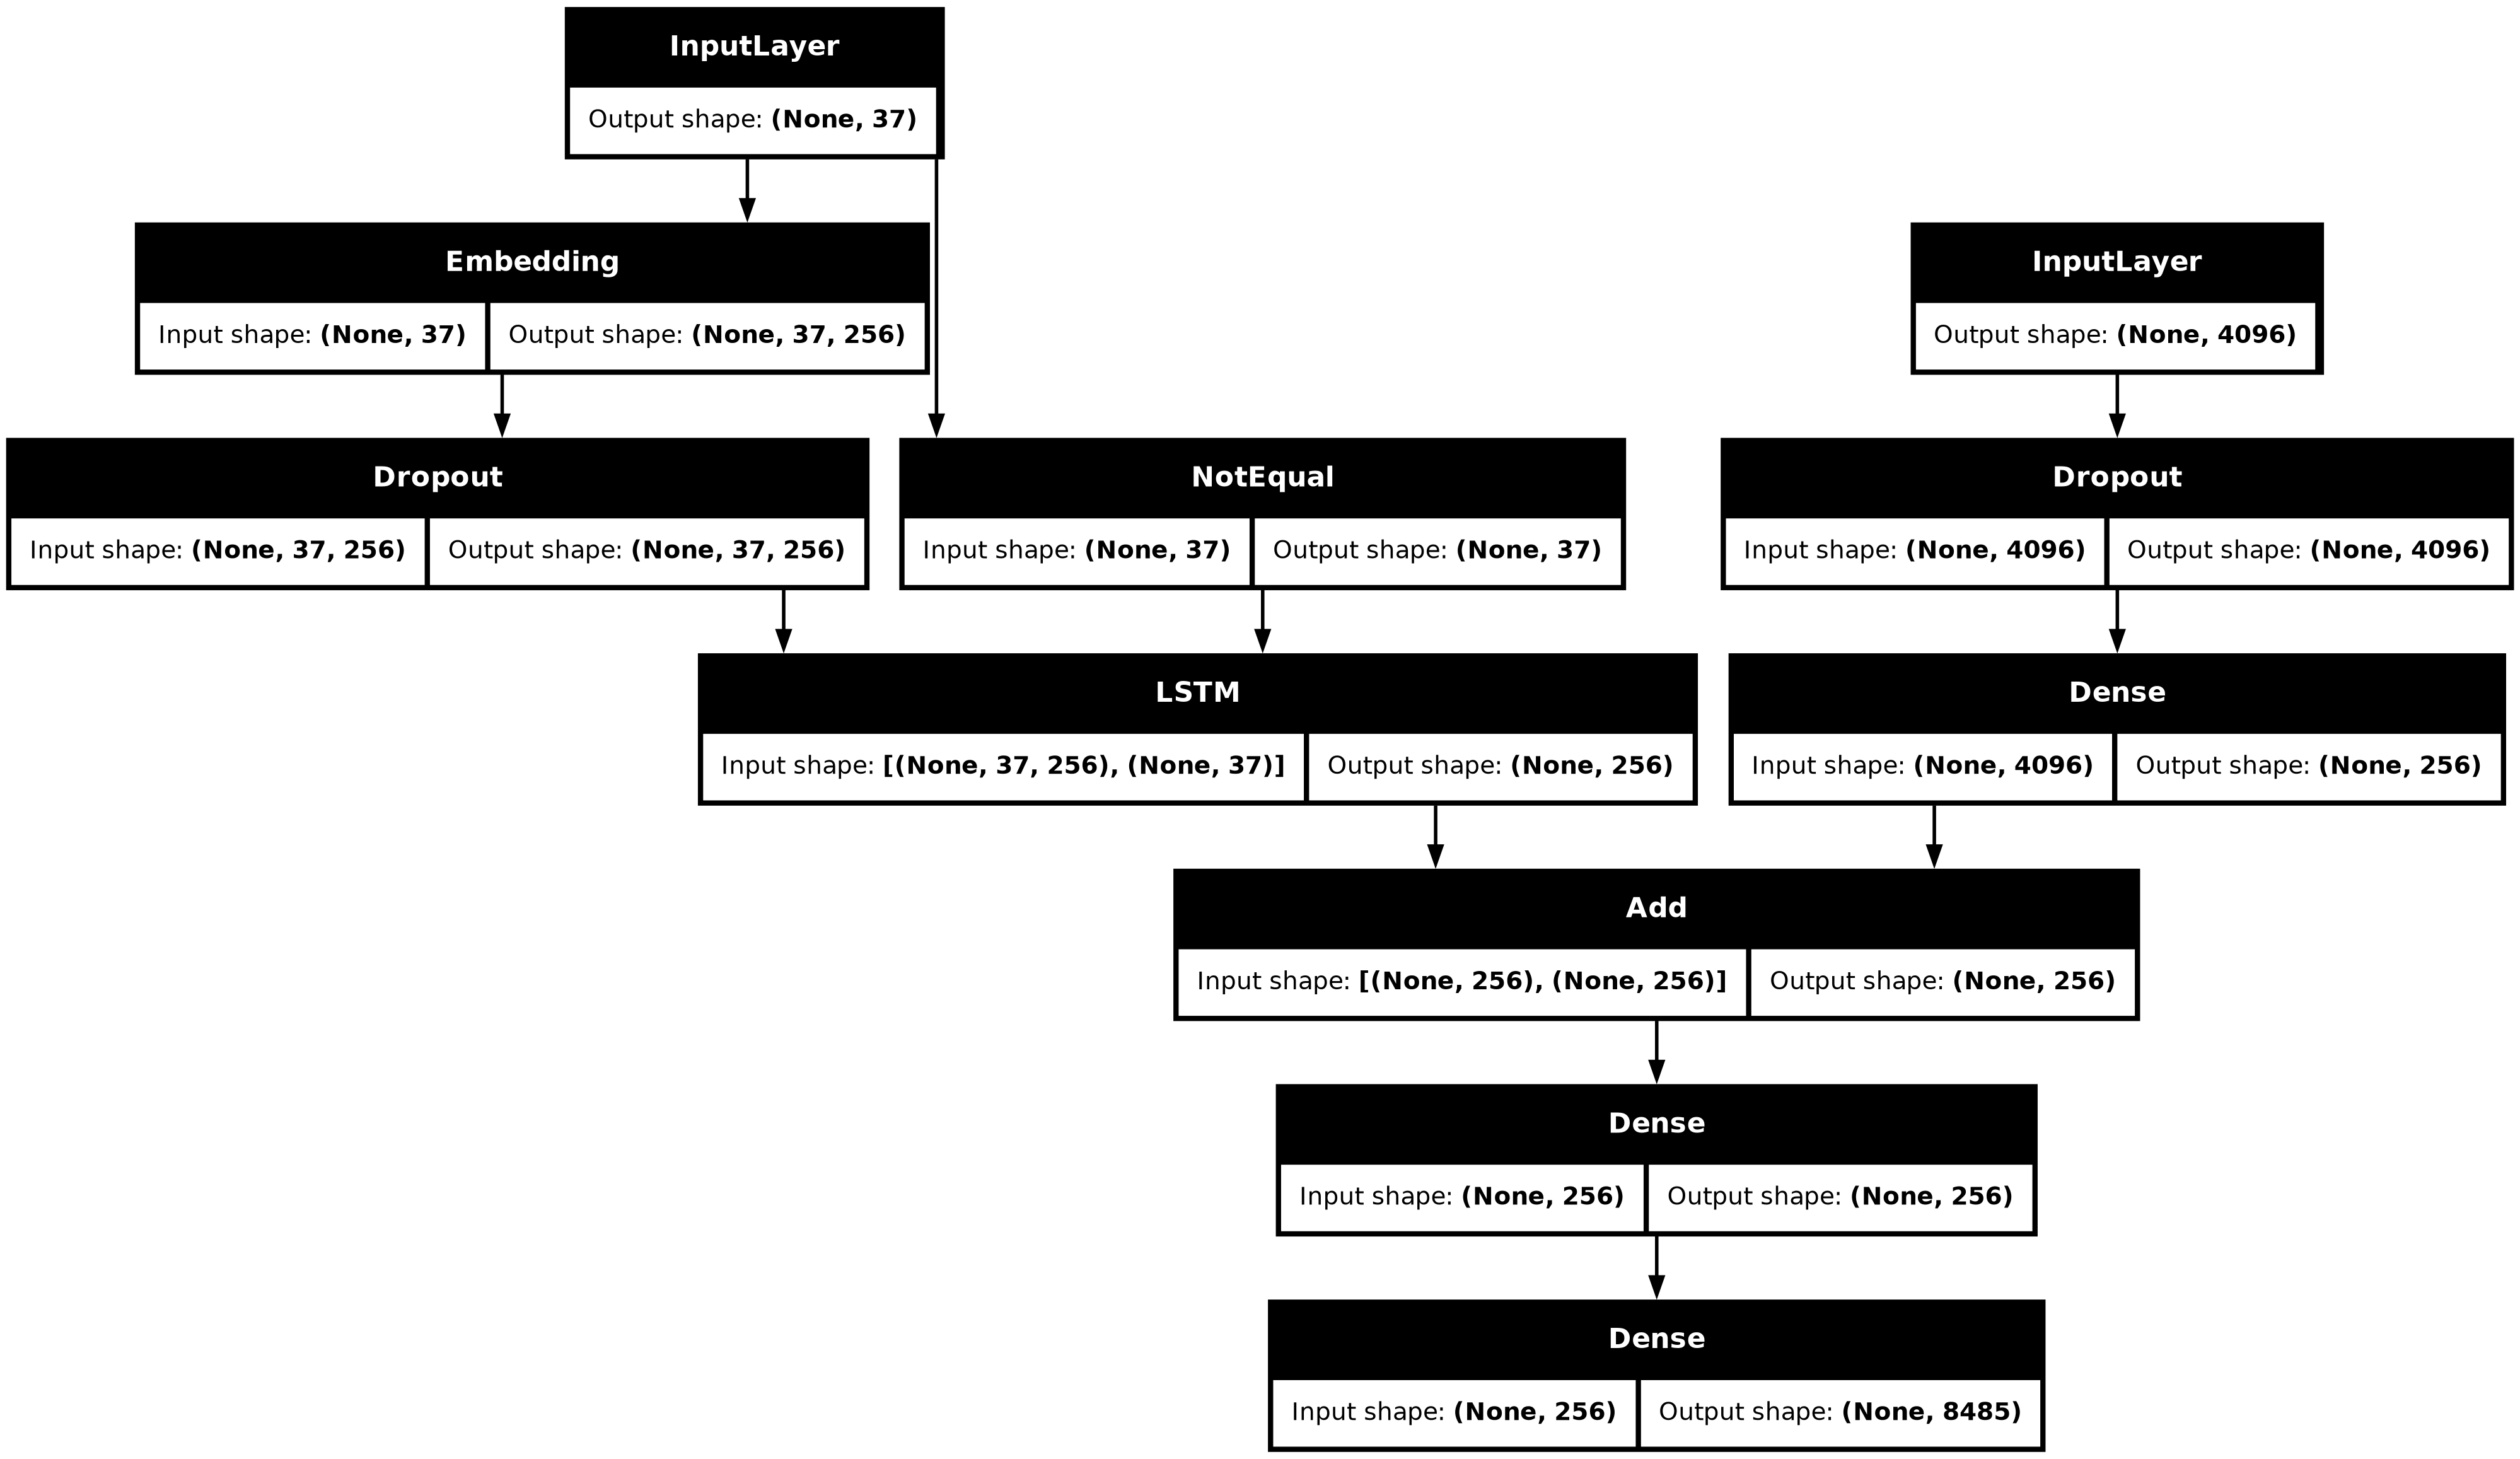

In [23]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,), name="image")
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,), name="text")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

## Training the Model

### Purpose

The training loop is designed to fit the model to the data over a specified number of epochs, using a data generator to manage memory and efficiency.

### Steps

1. **Set Training Parameters**:
   - **Epochs**: The number of times the entire dataset will pass through the model. In this case, it is set to 20 epochs.
   - **Batch Size**: The number of samples processed before the model updates. Here, it is set to 32.
   - **Steps Per Epoch**: The number of batches to process in each epoch. It is calculated as the total number of training samples divided by the batch size.

2. **Training Loop**:
   - **Iterate Over Epochs**: For each epoch, the following steps are executed:
     - **Create Data Generator**: Initializes the `data_generator` function to yield batches of data.
     - **Fit the Model**: Trains the model for one epoch using the `fit` method, with the data generator as the input. The `steps_per_epoch` parameter specifies how many batches to process before concluding the epoch. Verbosity is set to 1 to display training progress.

### Summary

This code trains the model over a series of epochs using a data generator to efficiently handle large datasets. The model updates its weights based on the data provided by the generator, improving its performance on the task.


In [24]:
# train the model
epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 ━━━━━━━━━━━━━━━━━━━━ 808s 4s/step - loss: 5.0974
227/227 ━━━━━━━━━━━━━━━━━━━━ 802s 4s/step - loss: 3.4256
227/227 ━━━━━━━━━━━━━━━━━━━━ 804s 4s/step - loss: 3.0254
227/227 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - loss: 2.7870
227/227 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - loss: 2.6157
227/227 ━━━━━━━━━━━━━━━━━━━━ 803s 4s/step - loss: 2.4918
227/227 ━━━━━━━━━━━━━━━━━━━━ 804s 4s/step - loss: 2.3971
227/227 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - loss: 2.3267
227/227 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - loss: 2.2626
227/227 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - loss: 2.2024
227/227 ━━━━━━━━━━━━━━━━━━━━ 800s 4s/step - loss: 2.1517
227/227 ━━━━━━━━━━━━━━━━━━━━ 796s 4s/step - loss: 2.1003
227/227 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - loss: 2.0528
227/227 ━━━━━━━━━━━━━━━━━━━━ 800s 4s/step - loss: 2.0122
227/227 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - loss: 1.9754
227/227 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - loss: 1.9443
227/227 ━━━━━━━━━━━━━━━━━━━━ 796s 4s/step - loss: 1.9130
227/227 ━━━━━━━━━━━━━━━━━━━━ 80

In [25]:
# save the model
model.save(WORKING_DIR+'/best_model.h5')

## Generate Captions for the Image

In [26]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

## Generating a Caption for an Image

### Purpose

The function `predict_caption` generates a caption for a given image using a trained model. It constructs the caption word by word, starting with an initial tag and predicting subsequent words until it reaches a termination condition.

### Steps

1. **Initialize the Caption**:
   - Start with the tag `startseq` to indicate the beginning of the caption generation process.

2. **Iterate to Generate Words**:
   - For a maximum length defined by `max_length`, perform the following steps:
     - **Encode Input Sequence**: Convert the current sequence of words into a sequence of integers using the tokenizer.
     - **Pad the Sequence**: Ensure the sequence has a consistent length by padding it.
     - **Predict the Next Word**: Use the model to predict the next word in the sequence based on the current image and sequence.
     - **Convert Index to Word**: Translate the predicted index into a word using a mapping function (`idx_to_word`).
     - **Check for Termination**: If the predicted word is not found or if it matches `endseq`, stop the caption generation process.
     - **Update the Sequence**: Append the predicted word to the current sequence.

3. **Return the Generated Caption**:
   - Return the complete caption as a string, which includes the start and end tags.

### Summary

This function generates a descriptive caption for an image by iteratively predicting the next word based on the model’s output and updating the sequence until a complete caption is formed or a stopping condition is met. The process involves encoding, padding, predicting, and decoding steps to construct the final caption.


In [27]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

## Evaluating Model Performance Using BLEU Score

### Purpose

The BLEU (Bilingual Evaluation Understudy) score is used to evaluate the quality of generated captions by comparing them to reference captions. The `corpus_bleu` function from NLTK computes this metric for a set of predicted captions against actual captions.

### Steps

1. **Prepare Data for Evaluation**:
   - Initialize lists to store actual and predicted captions.
   - For each key in the test dataset:
     - Retrieve the actual captions for the image from the `mapping`.
     - Generate the predicted caption using the `predict_caption` function.
     - Split both actual and predicted captions into lists of words.
     - Append these lists to the `actual` and `predicted` lists, respectively.

2. **Compute BLEU Score**:
   - **BLEU-1**: Measures the precision of unigrams (single words). Calculated with weights `(1.0, 0, 0, 0)`, giving full weight to single words.
   - **BLEU-2**: Measures the precision of bigrams (pairs of words). Calculated with weights `(0.5, 0.5, 0, 0)`, giving equal weight to unigrams and bigrams.

3. **Print Results**:
   - Output the BLEU-1 and BLEU-2 scores, which represent the quality of the generated captions in comparison to the reference captions.

### Summary

This process evaluates the performance of a captioning model by calculating BLEU scores, which quantify how well the generated captions match reference captions. The BLEU-1 and BLEU-2 scores specifically measure the precision of single words and word pairs, respectively.


In [28]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1: 0.565516
BLEU-2: 0.377896


## Generating and Displaying Captions for Images

### Purpose

The function `generate_caption` is designed to:
1. Load an image from the file system.
2. Retrieve and display actual captions associated with the image.
3. Generate and display a predicted caption for the image using a trained model.
4. Display the image.

### Steps

1. **Load the Image**:
   - Extract the image ID from the image file name.
   - Construct the path to the image using the `BASE_DIR` and image file name.
   - Open the image using the PIL library.

2. **Retrieve Actual Captions**:
   - Obtain the list of actual captions for the image from the `mapping` dictionary.
   - Print each actual caption.

3. **Generate and Display Predicted Caption**:
   - Use the `predict_caption` function to generate a caption for the image.
   - Print the predicted caption.

4. **Display the Image**:
   - Use Matplotlib to display the image alongside the captions.

### Summary

This function provides a comprehensive view of how well the model performs by comparing actual and predicted captions for a given image. It also visually displays the image to facilitate better understanding of the generated captions.


In [29]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq startseq black dog and spotted dog are fighting endseq endseq
startseq startseq black dog and tri-colored dog playing with each other on the road endseq endseq
startseq startseq black dog and white dog with brown spots are staring at each other in the street endseq endseq
startseq startseq two dogs of different breeds looking at each other on the road endseq endseq
startseq startseq two dogs on pavement moving toward each other endseq endseq
--------------------Predicted--------------------
startseq startseq two dogs one another one another endseq


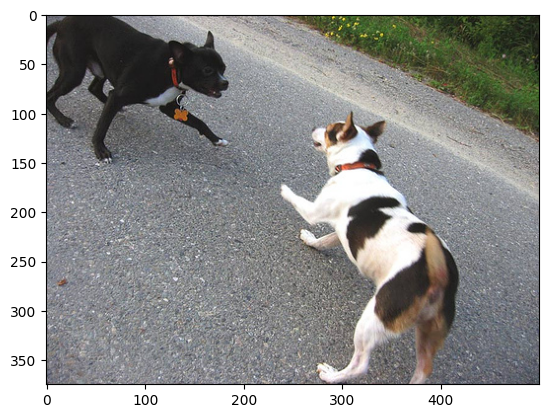

In [30]:
generate_caption("1001773457_577c3a7d70.jpg")

---------------------Actual---------------------
startseq startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq endseq
startseq startseq little girl is sitting in front of large painted rainbow endseq endseq
startseq startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq endseq
startseq startseq there is girl with pigtails sitting in front of rainbow painting endseq endseq
startseq startseq young girl with pigtails painting outside in the grass endseq endseq
--------------------Predicted--------------------
startseq startseq little girl in pigtails is playing with fingerpaints endseq


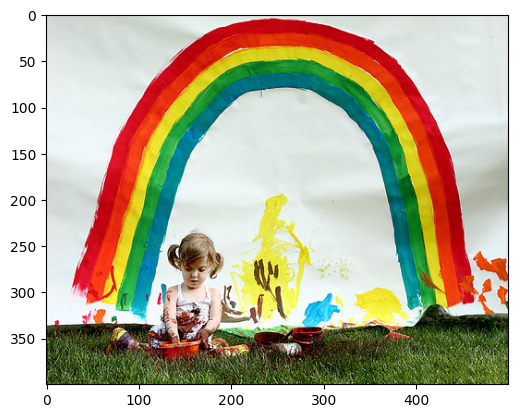

In [31]:
generate_caption("1002674143_1b742ab4b8.jpg")

---------------------Actual---------------------
startseq startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq endseq
startseq startseq little girl is sitting in front of large painted rainbow endseq endseq
startseq startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq endseq
startseq startseq there is girl with pigtails sitting in front of rainbow painting endseq endseq
startseq startseq young girl with pigtails painting outside in the grass endseq endseq
--------------------Predicted--------------------
startseq startseq little girl in pigtails is playing with fingerpaints endseq


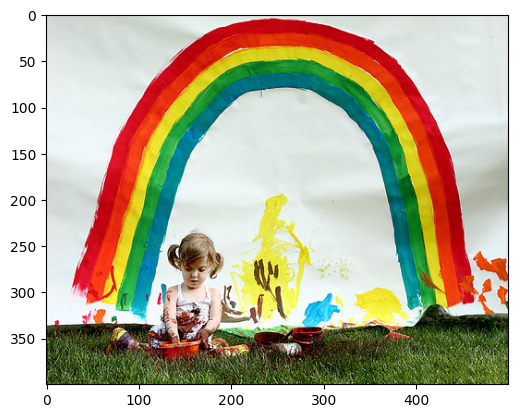

In [32]:
generate_caption("1002674143_1b742ab4b8.jpg")

In [33]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [34]:
image_path = '/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg'
# load image
image = load_img(image_path, target_size=(224, 224))
# convert image pixels to numpy array
image = img_to_array(image)
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# preprocess image for vgg
image = preprocess_input(image)
# extract features
feature = vgg_model.predict(image, verbose=0)
# predict from the trained model
predict_caption(model, feature, tokenizer, max_length)

'startseq startseq woman is sitting on wooden bench next to playhouse endseq'